**IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, matthews_corrcoef

**CARREGAMENTO DO DATASET**

In [ ]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**VERICANDO SE HÁ VALORES NaN**

In [ ]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**VERIFICANDO SE HÁ VALORES NULOS**

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**VERIFICANDO OS TIPOS DE DADOS DO DATASET**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**MATRIZ DE CORRELAÇÃO DO DATASET**

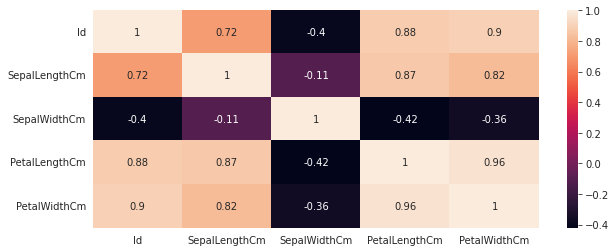

In [ ]:
correlacao = iris.corr()
plt.figure(figsize = (10,4))
sns.heatmap(correlacao, xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True)

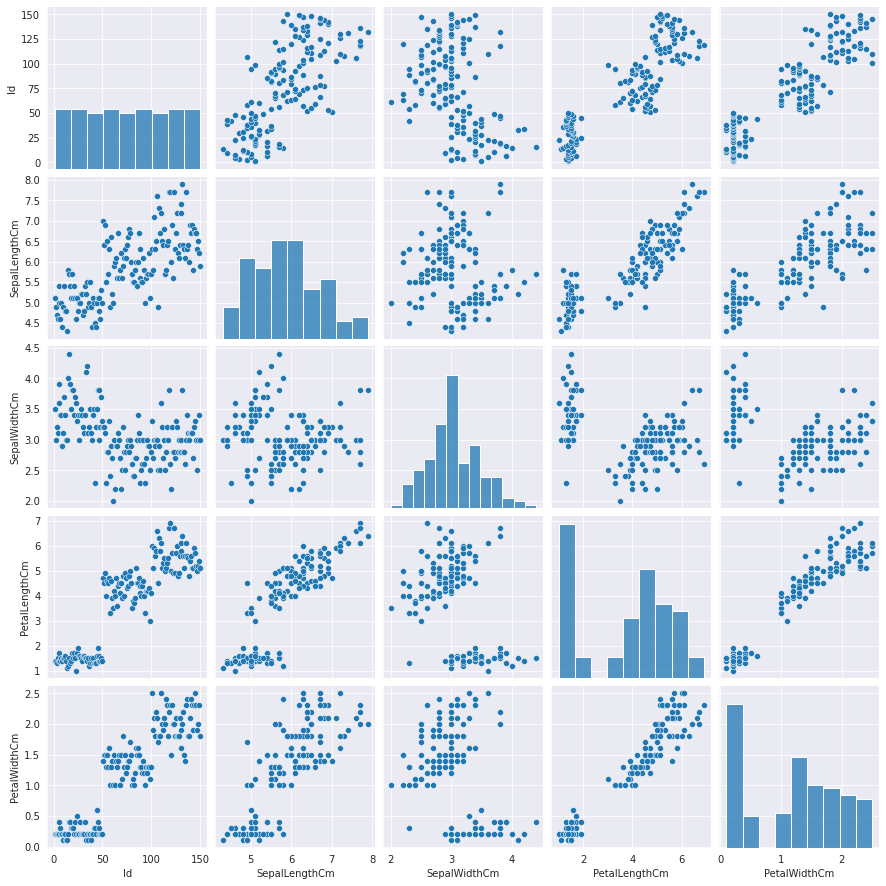

In [ ]:
sns.pairplot(iris)

**QUANTIDADES DE CADA ATRIBUTO DA FEATURE CLASS (TARGET)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


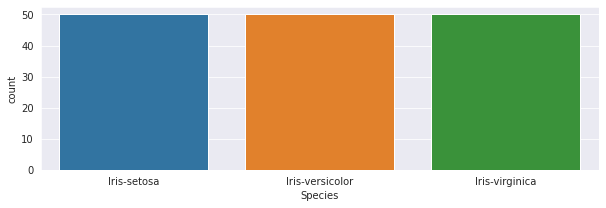

In [ ]:
plt.figure(figsize = (10,3))
sns.set_style('darkgrid')
sns.countplot(iris['Species'])

**SEPARANDO AS VARIAVEIS PREVISORAS DA VARIÁVEL QUE SERÁ PREVISTA (TARGET)**

In [ ]:
previsores = iris.drop(['Id','Species'], axis=1)
target = iris['Species']

**FEATURES IMPORTANTES**

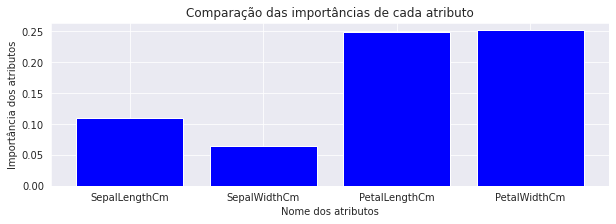

In [ ]:
forest_clf = ExtraTreesClassifier(n_estimators=250, random_state=420)
forest_clf.fit(previsores,target)

imp_features = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis = 0)
 
plt.figure(figsize = (10,3))
plt.bar(previsores.columns, std, color = 'blue') 
plt.xlabel('Nome dos atributos') 
plt.ylabel('Importância dos atributos') 
plt.title('Comparação das importâncias de cada atributo') 
plt.show()

In [ ]:
previsores.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Transformando as váriaveis do target em variáveis do tipo Dummy (OneHotEncoder)**

In [ ]:
target = pd.get_dummies(target, columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
target.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


**VERIFICANDO A QUANTIDADE DE ATRIBUTOS DA VARIÁVEL PREVISORES**

In [ ]:
previsores.shape

(150, 4)

**VERIFICANDO A QUANTIDADE DE ATRIBUTOS DA VARIÁVEL TARGET**

In [ ]:
target.shape

(150, 3)

**SEPARANDO O DATASET EM BASE DE TREINAMENTO E TESTE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(previsores, target, test_size = 0.20)

**IMPLEMENTAÇÃO DO MODELO DE REDE NEURAL COM CAMADAS OCULTAS**

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=4,kernel_initializer='normal', activation='relu', input_dim = 4))
#modelo.add(Dropout(0.2))

modelo.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
#modelo.add(Dropout(0.1))

modelo.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
#modelo.add(Dropout(0.1))

modelo.add(Dense(units=3, activation='softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

**REALIZANDO O TREINAMENTO**

In [ ]:
modelo.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.0986 - categorical_accuracy: 0.3583
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0979 - categorical_accuracy: 0.3583
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0975 - categorical_accuracy: 0.3583
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0967 - categorical_accuracy: 0.3583
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0953 - categorical_accuracy: 0.3583
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0936 - categorical_accuracy: 0.3583
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0908 - categorical_accuracy: 0.3583
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0870 - categorical_accuracy: 0.3583
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0822 - categorical_accuracy: 0.3583
E

In [ ]:
previsoes = modelo.predict(X_test)

In [ ]:
previsoes = (previsoes > 0.5)

cont = 0
for i in previsoes:
  for x in i:
    if x == True:
      cont += 1
      break
    else:
      cont += 1

if cont == 1:
  print('O modelo diz que essa planta pertence a espécie: Iris-Setosa')
elif cont == 2:
  print('O modelo diz que essa planta pertence a espécie: Iris-Versicolor')
else:
  print('O modelo diz que essa planta pertence a espécie: Iris-Virginica')


In [ ]:
matriz = confusion_matrix(y_test.values.argmax(axis=1), previsoes.argmax(axis=1))

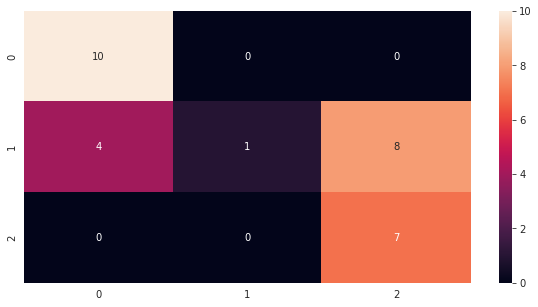

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(matriz, annot = True)